In [139]:
import os
import pandas as pd
import numpy as np
import glob
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [140]:
data_folder = 'dataCSVv10/'
organs = ["adipose_subcutaneous","artery_aorta","artery_coronary","brain_cerebellum","brain_cortex","colon_sigmoid","heart_atrial_appendage","liver","lung","nerve_tibial","pancreas","skin_sun_exposed_lower_leg"]

In [141]:
# Function to load and prepare data for clustering
def load_data_for_organ(organ_name):
    csv_file = glob.glob(os.path.join(data_folder, f'gene_tpm_v10_{organ_name}.csv'))[0]
    df = pd.read_csv(csv_file)
    expression_data = df.iloc[:, 3:].transpose()
    return expression_data

In [142]:
organ_data = {}
for organ in organs:
    organ_data[organ] = load_data_for_organ(organ)

In [143]:
dataframe = organ_data[organs[11]]
dataframe.fillna(dataframe.mean(), inplace=True)
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,59023,59024,59025,59026,59027,59028,59029,59030,59031,59032
GTEX-111FC-0126-SM-5N9DL,0.000000,5.40810,0.0,0.000000,0.000000,0.000000,0.000000,0.023548,0.029970,0.008903,...,27544.8,0.00000,0.000000,0.434139,4666.34,5228.96,13.8484,20740.9,0.467028,2.266460
GTEX-111VG-2426-SM-5GZXD,0.000000,2.96394,0.0,0.000000,0.036693,0.053248,0.031633,0.051255,0.021745,0.077519,...,24797.0,1.29648,0.758112,0.000000,8922.74,13530.30,31.1156,15138.8,0.000000,1.973320
GTEX-1122O-2126-SM-5EGIR,0.029146,3.90853,0.0,0.058191,0.000000,0.119984,0.035639,0.019249,0.000000,0.029112,...,10941.7,0.00000,0.000000,0.709767,2281.70,8954.10,43.0901,10453.1,2.290610,0.000000
GTEX-1128S-2326-SM-5GZZY,0.000000,5.76606,0.0,0.000000,0.000000,0.000000,0.025305,0.095673,0.069581,0.093020,...,36578.8,0.00000,0.000000,0.000000,14088.50,22245.20,58.5993,24375.5,1.084300,1.052410
GTEX-113IC-0126-SM-5HL6T,0.000000,7.68397,0.0,0.000000,0.000000,0.075453,0.089648,0.048419,0.000000,0.036615,...,30766.2,0.00000,0.000000,0.892688,12661.00,20312.10,69.8108,20471.7,6.722210,0.932071


In [144]:
phenotype = pd.read_csv('GTEx_Analysis_v10_Annotations_SubjectPhenotypesDS.txt', sep='\t')
phenotype.head()

,SUBJID,SEX,AGE,DTHHRDY
0,GTEX-1117F,2,60-69,4.0
1,GTEX-111CU,1,50-59,0.0
2,GTEX-111FC,1,60-69,1.0
3,GTEX-111VG,1,60-69,3.0
4,GTEX-111YS,1,60-69,0.0


In [145]:
print(phenotype['AGE'].nunique())
print(phenotype['DTHHRDY'].nunique())

6
5


In [146]:
# n_clusters = 6
# kmeans = KMeans(n_clusters=n_clusters, random_state=42)
# kmeans.fit(dataframe)
# dataframe['Cluster'] = kmeans.labels_
# dataframe['Cluster']

In [147]:
dataframe['SUBJID'] = dataframe.index.str.split('-').str[0] + '-' + dataframe.index.str.split('-').str[1]
merged_df = pd.merge(dataframe, phenotype, how='left', on='SUBJID')
merged_df.set_index(dataframe.index, inplace=True)
merged_df.drop(columns=['SUBJID'], inplace=True)
merged_df

,0,1,2,3,4,5,6,7,8,9,...,59026,59027,59028,59029,59030,59031,59032,SEX,AGE,DTHHRDY
GTEX-111FC-0126-SM-5N9DL,0.000000,5.40810,0.0,0.000000,0.000000,0.000000,0.000000,0.023548,0.029970,0.008903,...,0.434139,4666.34,5228.96,13.8484,20740.9,0.467028,2.266460,1,60-69,1.0
GTEX-111VG-2426-SM-5GZXD,0.000000,2.96394,0.0,0.000000,0.036693,0.053248,0.031633,0.051255,0.021745,0.077519,...,0.000000,8922.74,13530.30,31.1156,15138.8,0.000000,1.973320,1,60-69,3.0
GTEX-1122O-2126-SM-5EGIR,0.029146,3.90853,0.0,0.058191,0.000000,0.119984,0.035639,0.019249,0.000000,0.029112,...,0.709767,2281.70,8954.10,43.0901,10453.1,2.290610,0.000000,2,60-69,0.0
GTEX-1128S-2326-SM-5GZZY,0.000000,5.76606,0.0,0.000000,0.000000,0.000000,0.025305,0.095673,0.069581,0.093020,...,0.000000,14088.50,22245.20,58.5993,24375.5,1.084300,1.052410,2,60-69,2.0
GTEX-113IC-0126-SM-5HL6T,0.000000,7.68397,0.0,0.000000,0.000000,0.075453,0.089648,0.048419,0.000000,0.036615,...,0.892688,12661.00,20312.10,69.8108,20471.7,6.722210,0.932071,1,60-69,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GTEX-ZYW4-0126-SM-5E44A,0.000000,2.08963,0.0,0.059341,0.000000,0.061178,0.000000,0.078517,0.000000,0.029688,...,1.447590,8123.10,12099.80,31.2805,15140.7,2.335880,1.511450,1,60-69,3.0
GTEX-ZYY3-0126-SM-5GZY5,0.000000,14.85090,0.0,0.000000,0.045574,0.066137,0.078578,0.042441,0.027008,0.032094,...,0.782462,6687.76,12316.60,44.2828,14696.6,3.366960,1.633970,2,60-69,4.0
GTEX-ZZ64-1726-SM-5GZYB,0.000000,8.18698,0.0,0.000000,0.000000,0.000000,0.033000,0.017824,0.045369,0.080870,...,0.657215,7921.64,10899.30,35.1658,19689.5,0.000000,2.058630,1,20-29,0.0
GTEX-ZZPT-0226-SM-5E43X,0.000000,4.00980,0.0,0.048417,0.034396,0.099831,0.088959,0.112110,0.000000,0.036334,...,1.181110,6470.48,6516.84,17.0148,28450.7,0.000000,1.849820,1,50-59,4.0


In [148]:
tsne = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=42)
reduced_data = tsne.fit_transform(merged_df.drop(columns=['SEX', 'AGE','DTHHRDY']))
reduced_df = pd.DataFrame(data=reduced_data, columns=['Dim1', 'Dim2'])
# reduced_df['Cluster'] = merged_df['Cluster'].values
reduced_df['AGE'] = merged_df['AGE'].values
reduced_df['DTHHRDY'] = merged_df['DTHHRDY'].values

c:\Users\mubas\miniconda3\envs\deg\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


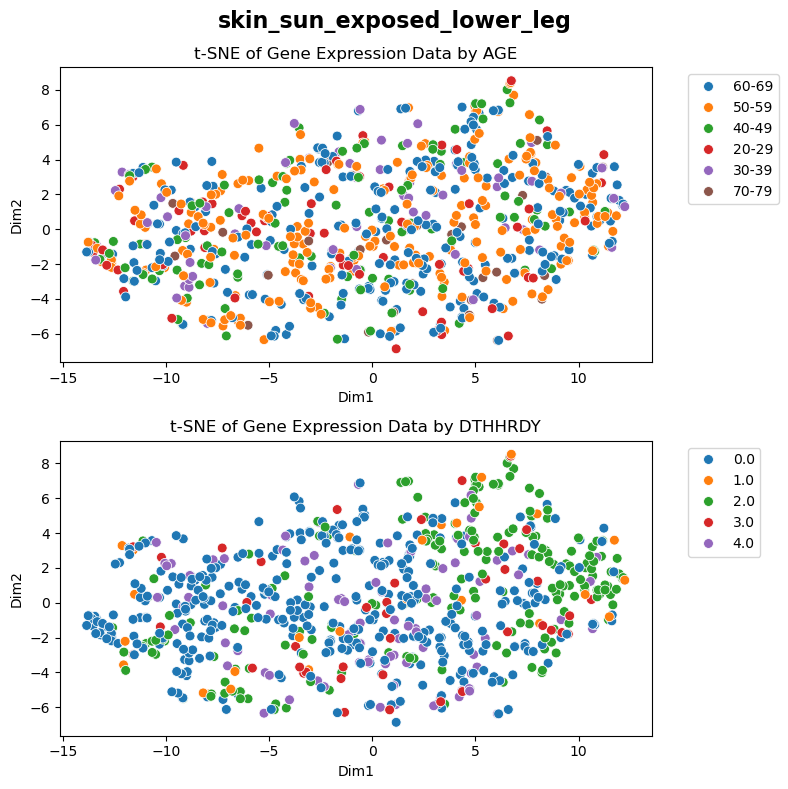

In [149]:
plt.figure(figsize=(8, 8))

# First plot by Cluster
# plt.subplot(3, 1, 1)
# sns.scatterplot(x='Dim1', y='Dim2', hue='Cluster', palette= 'tab10', data=reduced_df, s=100, alpha=0.7)
# plt.title('t-SNE of Gene Expression Data with K-means Clustering')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Second plot by Age
plt.subplot(2, 1, 1)
sns.scatterplot(x='Dim1', y='Dim2', hue='AGE', palette='tab10', data=reduced_df, s=50, alpha=1)
plt.title('t-SNE of Gene Expression Data by AGE')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Third plot by DTHHRDY
plt.subplot(2, 1, 2)
sns.scatterplot(x='Dim1', y='Dim2', hue='DTHHRDY', palette='tab10', data=reduced_df, s=50, alpha=1)
plt.title('t-SNE of Gene Expression Data by DTHHRDY')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


plt.suptitle(f'{organs[11]}',fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig(f'Plots/{organs[11]}.png')
plt.show()
plt.close()